## 1º Definir função para simular o circuito e retornar os dados da corrente elétrica

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Tue Feb  4 21:21:44 2020

@author: Edson Porto da Silva
"""
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy import signal

def simulador(R,L,C,a):
    
    # Resolução numérica de um circuito RLC série alimentado por uma onda quadrada
    # de tensão.


    # parâmetros do circuito:
    V0 = 0                # tensão inicial no capacitor [volts]
    I0 = 0                # corrente inicial no indutor [ampères]
    fq = 2               # frequência da onda quadrada [hertz]
    Vq = 15              # amplitude da onda quadrada [volts]
    w0 = 1/np.sqrt(L*C)   # frequência angular de ressonância [rad/segundo]

    t = np.arange(0,5,0.0001)*(2/0.1)   # discretização do intervalo de tempo [segundos]
    Vs = Vq*signal.square(2*np.pi*fq*t) # onda quadrada na entrada do circuito

    vC    = np.zeros(len(t))
    x     = np.zeros(len(t))

    # EDO da tensão sobre o capacitor: vc''(t)+(R/L)vc'(t)+vc(t)/LC = vs/LC

    # Solução numérica:
    vC[0] = V0       # condição incial de vc
    x[0]  = I0/C     # condição inicial da derivada vc'(t)
    #
    # Integração numérica via método de Euler:
    deltaT    = t[1]-t[0] # passo de integração
    numPoints = len(t)-1

    for kk in range(0, numPoints):
        vC[kk+1] = vC[kk]+x[kk]*deltaT                                # calcula vc(t+deltaT)
        x[kk+1]  = x[kk]+(-R/L*x[kk]-1/(L*C)*(vC[kk]-Vs[kk]))*deltaT  # calcula vc'(t+deltaT)

    # cálculo das tensões e da corrente partir de vc(t):
    i  = np.append(I0, C*np.diff(vC)/deltaT)    # corrente no circuito
    
    vR = R*i                                    # tensão no resistor
    vL = Vs-vR-vC                               # tensão no indutor(LKT)
    if a ==1:
        
        plt.figure(1, figsize=(12, 9), dpi=80, facecolor='w', edgecolor='k')
        plt.plot(t, i)
        plt.legend(['corrente i(t)']);
        plt.grid(color='k', linestyle='--', linewidth=0.1)
        plt.ylabel('ampères (A)', fontsize = 14)
        plt.xlabel('tempo (s)', fontsize = 14)
        plt.title('Corrente no circuito RLC série', fontsize = 14)
        plt.show(block=False)
    return(i)

In [2]:
def normalizacao (iresult):
    # Obtém a média dos valores de entrada
    media_iresult = np.mean(iresult)

    # Obtém o desvio padrão dos valores de entrada
    desvio_padrao_iresult = np.std(iresult)

    # Normaliza os valores de entrada
    iresult_norm = (iresult - media_iresult) / desvio_padrao_iresult
    iresult_norm.shape
    return(iresult_norm)



In [3]:
def pca_conjunto(conjunto):
    
    m = conjunto.shape[0]
    iresult=np.empty((0,50000))
    for i in range (m):
        R=conjunto[i,0]
        L=conjunto[i,1]
        C=conjunto[i,2]
        print("Gráfico número:",i,"\n")
        it = simulador(R,L,C,0)
        iresult= np.vstack((iresult,it))


    from sklearn.decomposition import PCA

    iresult_norm=normalizacao (iresult)
    pca = PCA(n_components=600)

    X_pca=pca.fit_transform(iresult_norm)
    X_pca.shape
    return(X_pca)

## 2º Gerar os valores de R,L e C

In [4]:
#CORRIGIR OS IFS
conjunto = np.empty((0,3)) #Matriz que armazena os valores de R,L e C
tam = 0 #Quantidade de valores armazenados (linhas da matriz)
w_arm = np.empty((0,))
while tam < 2000:    #Superamortecido

    l = random.uniform(0.1, 10)
    c = random.uniform(0.1, 10)
    r = random.uniform(1, 20)
    w = 1/(l*c)**(1/2)
    alpha = r/(2*l)
    param= abs(w-alpha)
    if alpha>w and w>0.1 and w<10 :
        w_arm = np.hstack((w_arm,w))
        conj =r,l,c
        conjunto =np.vstack((conjunto,conj))
        tam+=1
      
while tam < 4000:     #Subamortecido

    l = random.uniform(0.1, 10)
    c = random.uniform(0.1, 10)
    r = random.uniform(1, 20)
    w = 1/(l*c)**(1/2)
    alpha = r/(2*l)
    param= abs(w-alpha)
    if alpha<w and w>0.1 and w<10 :
        w_arm = np.hstack((w_arm,w))
        conj =r,l,c
        conjunto =np.vstack((conjunto,conj))
        tam+=1
while tam < 6000:     #Criticamente amortecido
    
    l = random.uniform(0.1, 10)
    c = random.uniform(0.1, 10)
    r = random.uniform(1, 20)
    w = 1/(l*c)**(1/2)
    alpha = r/(2*l)
    param= abs(w-alpha)
    if param<0.001 and w>0.1 and w<10 :
        w_arm = np.hstack((w_arm,w))
        conj =r,l,c
        conjunto =np.vstack((conjunto,conj))
        tam+=1



### 3º Avaliar os dados 

In [5]:
print("Valor máximo de w: ",np.max(w_arm))
print("Valor mínimo de w: ",np.min(w_arm))
print("Valor médio de w: ",np.mean(w_arm))

print("")
print("Valor máximo de resistor: ",np.max(conjunto[:,0]))
print("Valor mínimo de resistor: ",np.min(conjunto[:,0]))
print("Valor médio de resistor: ",np.mean(conjunto[:,0]))

print("")
print("Valor máximo de indutor: ",np.max(conjunto[:,1]))
print("Valor mínimo de indutor: ",np.min(conjunto[:,1]))
print("Valor médio de indutor: ",np.mean(conjunto[:,1]))

print("")
print("Valor máximo de capacitor: ",np.max(conjunto[:,2]))
print("Valor mínimo de capacitor: ",np.min(conjunto[:,2]))
print("Valor médio de capacitor: ",np.mean(conjunto[:,2]))
print(w_arm.shape)


Valor máximo de w:  3.2465138163556526
Valor mínimo de w:  0.10096778340754604
Valor médio de w:  0.32240818911018515

Valor máximo de resistor:  19.994408552504954
Valor mínimo de resistor:  1.0002068781100544
Valor médio de resistor:  5.685432921656635

Valor máximo de indutor:  9.999786231452045
Valor mínimo de indutor:  0.1210735029246428
Valor médio de indutor:  6.104368518215793

Valor máximo de capacitor:  9.99801050247321
Valor mínimo de capacitor:  0.10011733017994336
Valor médio de capacitor:  4.349185859183788
(6000,)


## 4º Separar os valores de treinamento e de teste

In [6]:
#Separação do conjunto parar os valores de entrada e para os valores de teste
np.random.shuffle(conjunto) #embaralhando a matriz conjunto
conjunto_teste = conjunto[:1200,:]
conjunto = conjunto[1200:,:]
print(conjunto.shape)
print(conjunto_teste.shape)

(4800, 3)
(1200, 3)


In [7]:
X_Pca = pca_conjunto(conjunto)
Y_Pca = pca_conjunto(conjunto_teste)

Gráfico número: 0 

Gráfico número: 1 

Gráfico número: 2 

Gráfico número: 3 

Gráfico número: 4 

Gráfico número: 5 

Gráfico número: 6 

Gráfico número: 7 

Gráfico número: 8 

Gráfico número: 9 

Gráfico número: 10 

Gráfico número: 11 

Gráfico número: 12 

Gráfico número: 13 

Gráfico número: 14 

Gráfico número: 15 

Gráfico número: 16 

Gráfico número: 17 

Gráfico número: 18 

Gráfico número: 19 

Gráfico número: 20 

Gráfico número: 21 

Gráfico número: 22 

Gráfico número: 23 

Gráfico número: 24 

Gráfico número: 25 

Gráfico número: 26 

Gráfico número: 27 

Gráfico número: 28 

Gráfico número: 29 

Gráfico número: 30 

Gráfico número: 31 

Gráfico número: 32 

Gráfico número: 33 

Gráfico número: 34 

Gráfico número: 35 

Gráfico número: 36 

Gráfico número: 37 

Gráfico número: 38 

Gráfico número: 39 

Gráfico número: 40 

Gráfico número: 41 

Gráfico número: 42 

Gráfico número: 43 

Gráfico número: 44 

Gráfico número: 45 

Gráfico número: 46 

Gráfico número: 47 

Gr

Gráfico número: 378 

Gráfico número: 379 

Gráfico número: 380 

Gráfico número: 381 

Gráfico número: 382 

Gráfico número: 383 

Gráfico número: 384 

Gráfico número: 385 

Gráfico número: 386 

Gráfico número: 387 

Gráfico número: 388 

Gráfico número: 389 

Gráfico número: 390 

Gráfico número: 391 

Gráfico número: 392 

Gráfico número: 393 

Gráfico número: 394 

Gráfico número: 395 

Gráfico número: 396 

Gráfico número: 397 

Gráfico número: 398 

Gráfico número: 399 

Gráfico número: 400 

Gráfico número: 401 

Gráfico número: 402 

Gráfico número: 403 

Gráfico número: 404 

Gráfico número: 405 

Gráfico número: 406 

Gráfico número: 407 

Gráfico número: 408 

Gráfico número: 409 

Gráfico número: 410 

Gráfico número: 411 

Gráfico número: 412 

Gráfico número: 413 

Gráfico número: 414 

Gráfico número: 415 

Gráfico número: 416 

Gráfico número: 417 

Gráfico número: 418 

Gráfico número: 419 

Gráfico número: 420 

Gráfico número: 421 

Gráfico número: 422 

Gráfico nú

Gráfico número: 751 

Gráfico número: 752 

Gráfico número: 753 

Gráfico número: 754 

Gráfico número: 755 

Gráfico número: 756 

Gráfico número: 757 

Gráfico número: 758 

Gráfico número: 759 

Gráfico número: 760 

Gráfico número: 761 

Gráfico número: 762 

Gráfico número: 763 

Gráfico número: 764 

Gráfico número: 765 

Gráfico número: 766 

Gráfico número: 767 

Gráfico número: 768 

Gráfico número: 769 

Gráfico número: 770 

Gráfico número: 771 

Gráfico número: 772 

Gráfico número: 773 

Gráfico número: 774 

Gráfico número: 775 

Gráfico número: 776 

Gráfico número: 777 

Gráfico número: 778 

Gráfico número: 779 

Gráfico número: 780 

Gráfico número: 781 

Gráfico número: 782 

Gráfico número: 783 

Gráfico número: 784 

Gráfico número: 785 

Gráfico número: 786 

Gráfico número: 787 

Gráfico número: 788 

Gráfico número: 789 

Gráfico número: 790 

Gráfico número: 791 

Gráfico número: 792 

Gráfico número: 793 

Gráfico número: 794 

Gráfico número: 795 

Gráfico nú

Gráfico número: 1119 

Gráfico número: 1120 

Gráfico número: 1121 

Gráfico número: 1122 

Gráfico número: 1123 

Gráfico número: 1124 

Gráfico número: 1125 

Gráfico número: 1126 

Gráfico número: 1127 

Gráfico número: 1128 

Gráfico número: 1129 

Gráfico número: 1130 

Gráfico número: 1131 

Gráfico número: 1132 

Gráfico número: 1133 

Gráfico número: 1134 

Gráfico número: 1135 

Gráfico número: 1136 

Gráfico número: 1137 

Gráfico número: 1138 

Gráfico número: 1139 

Gráfico número: 1140 

Gráfico número: 1141 

Gráfico número: 1142 

Gráfico número: 1143 

Gráfico número: 1144 

Gráfico número: 1145 

Gráfico número: 1146 

Gráfico número: 1147 

Gráfico número: 1148 

Gráfico número: 1149 

Gráfico número: 1150 

Gráfico número: 1151 

Gráfico número: 1152 

Gráfico número: 1153 

Gráfico número: 1154 

Gráfico número: 1155 

Gráfico número: 1156 

Gráfico número: 1157 

Gráfico número: 1158 

Gráfico número: 1159 

Gráfico número: 1160 

Gráfico número: 1161 

Gráfico núm

Gráfico número: 1476 

Gráfico número: 1477 

Gráfico número: 1478 

Gráfico número: 1479 

Gráfico número: 1480 

Gráfico número: 1481 

Gráfico número: 1482 

Gráfico número: 1483 

Gráfico número: 1484 

Gráfico número: 1485 

Gráfico número: 1486 

Gráfico número: 1487 

Gráfico número: 1488 

Gráfico número: 1489 

Gráfico número: 1490 

Gráfico número: 1491 

Gráfico número: 1492 

Gráfico número: 1493 

Gráfico número: 1494 

Gráfico número: 1495 

Gráfico número: 1496 

Gráfico número: 1497 

Gráfico número: 1498 

Gráfico número: 1499 

Gráfico número: 1500 

Gráfico número: 1501 

Gráfico número: 1502 

Gráfico número: 1503 

Gráfico número: 1504 

Gráfico número: 1505 

Gráfico número: 1506 

Gráfico número: 1507 

Gráfico número: 1508 

Gráfico número: 1509 

Gráfico número: 1510 

Gráfico número: 1511 

Gráfico número: 1512 

Gráfico número: 1513 

Gráfico número: 1514 

Gráfico número: 1515 

Gráfico número: 1516 

Gráfico número: 1517 

Gráfico número: 1518 

Gráfico núm

Gráfico número: 1833 

Gráfico número: 1834 

Gráfico número: 1835 

Gráfico número: 1836 

Gráfico número: 1837 

Gráfico número: 1838 

Gráfico número: 1839 

Gráfico número: 1840 

Gráfico número: 1841 

Gráfico número: 1842 

Gráfico número: 1843 

Gráfico número: 1844 

Gráfico número: 1845 

Gráfico número: 1846 

Gráfico número: 1847 

Gráfico número: 1848 

Gráfico número: 1849 

Gráfico número: 1850 

Gráfico número: 1851 

Gráfico número: 1852 

Gráfico número: 1853 

Gráfico número: 1854 

Gráfico número: 1855 

Gráfico número: 1856 

Gráfico número: 1857 

Gráfico número: 1858 

Gráfico número: 1859 

Gráfico número: 1860 

Gráfico número: 1861 

Gráfico número: 1862 

Gráfico número: 1863 

Gráfico número: 1864 

Gráfico número: 1865 

Gráfico número: 1866 

Gráfico número: 1867 

Gráfico número: 1868 

Gráfico número: 1869 

Gráfico número: 1870 

Gráfico número: 1871 

Gráfico número: 1872 

Gráfico número: 1873 

Gráfico número: 1874 

Gráfico número: 1875 

Gráfico núm

Gráfico número: 2190 

Gráfico número: 2191 

Gráfico número: 2192 

Gráfico número: 2193 

Gráfico número: 2194 

Gráfico número: 2195 

Gráfico número: 2196 

Gráfico número: 2197 

Gráfico número: 2198 

Gráfico número: 2199 

Gráfico número: 2200 

Gráfico número: 2201 

Gráfico número: 2202 

Gráfico número: 2203 

Gráfico número: 2204 

Gráfico número: 2205 

Gráfico número: 2206 

Gráfico número: 2207 

Gráfico número: 2208 

Gráfico número: 2209 

Gráfico número: 2210 

Gráfico número: 2211 

Gráfico número: 2212 

Gráfico número: 2213 

Gráfico número: 2214 

Gráfico número: 2215 

Gráfico número: 2216 

Gráfico número: 2217 

Gráfico número: 2218 

Gráfico número: 2219 

Gráfico número: 2220 

Gráfico número: 2221 

Gráfico número: 2222 

Gráfico número: 2223 

Gráfico número: 2224 

Gráfico número: 2225 

Gráfico número: 2226 

Gráfico número: 2227 

Gráfico número: 2228 

Gráfico número: 2229 

Gráfico número: 2230 

Gráfico número: 2231 

Gráfico número: 2232 

Gráfico núm

Gráfico número: 2547 

Gráfico número: 2548 

Gráfico número: 2549 

Gráfico número: 2550 

Gráfico número: 2551 

Gráfico número: 2552 

Gráfico número: 2553 

Gráfico número: 2554 

Gráfico número: 2555 

Gráfico número: 2556 

Gráfico número: 2557 

Gráfico número: 2558 

Gráfico número: 2559 

Gráfico número: 2560 

Gráfico número: 2561 

Gráfico número: 2562 

Gráfico número: 2563 

Gráfico número: 2564 

Gráfico número: 2565 

Gráfico número: 2566 

Gráfico número: 2567 

Gráfico número: 2568 

Gráfico número: 2569 

Gráfico número: 2570 

Gráfico número: 2571 

Gráfico número: 2572 

Gráfico número: 2573 

Gráfico número: 2574 

Gráfico número: 2575 

Gráfico número: 2576 

Gráfico número: 2577 

Gráfico número: 2578 

Gráfico número: 2579 

Gráfico número: 2580 

Gráfico número: 2581 

Gráfico número: 2582 

Gráfico número: 2583 

Gráfico número: 2584 

Gráfico número: 2585 

Gráfico número: 2586 

Gráfico número: 2587 

Gráfico número: 2588 

Gráfico número: 2589 

Gráfico núm

Gráfico número: 2904 

Gráfico número: 2905 

Gráfico número: 2906 

Gráfico número: 2907 

Gráfico número: 2908 

Gráfico número: 2909 

Gráfico número: 2910 

Gráfico número: 2911 

Gráfico número: 2912 

Gráfico número: 2913 

Gráfico número: 2914 

Gráfico número: 2915 

Gráfico número: 2916 

Gráfico número: 2917 

Gráfico número: 2918 

Gráfico número: 2919 

Gráfico número: 2920 

Gráfico número: 2921 

Gráfico número: 2922 

Gráfico número: 2923 

Gráfico número: 2924 

Gráfico número: 2925 

Gráfico número: 2926 

Gráfico número: 2927 

Gráfico número: 2928 

Gráfico número: 2929 

Gráfico número: 2930 

Gráfico número: 2931 

Gráfico número: 2932 

Gráfico número: 2933 

Gráfico número: 2934 

Gráfico número: 2935 

Gráfico número: 2936 

Gráfico número: 2937 

Gráfico número: 2938 

Gráfico número: 2939 

Gráfico número: 2940 

Gráfico número: 2941 

Gráfico número: 2942 

Gráfico número: 2943 

Gráfico número: 2944 

Gráfico número: 2945 

Gráfico número: 2946 

Gráfico núm

Gráfico número: 3261 

Gráfico número: 3262 

Gráfico número: 3263 

Gráfico número: 3264 

Gráfico número: 3265 

Gráfico número: 3266 

Gráfico número: 3267 

Gráfico número: 3268 

Gráfico número: 3269 

Gráfico número: 3270 

Gráfico número: 3271 

Gráfico número: 3272 

Gráfico número: 3273 

Gráfico número: 3274 

Gráfico número: 3275 

Gráfico número: 3276 

Gráfico número: 3277 

Gráfico número: 3278 

Gráfico número: 3279 

Gráfico número: 3280 

Gráfico número: 3281 

Gráfico número: 3282 

Gráfico número: 3283 

Gráfico número: 3284 

Gráfico número: 3285 

Gráfico número: 3286 

Gráfico número: 3287 

Gráfico número: 3288 

Gráfico número: 3289 

Gráfico número: 3290 

Gráfico número: 3291 

Gráfico número: 3292 

Gráfico número: 3293 

Gráfico número: 3294 

Gráfico número: 3295 

Gráfico número: 3296 

Gráfico número: 3297 

Gráfico número: 3298 

Gráfico número: 3299 

Gráfico número: 3300 

Gráfico número: 3301 

Gráfico número: 3302 

Gráfico número: 3303 

Gráfico núm

Gráfico número: 3618 

Gráfico número: 3619 

Gráfico número: 3620 

Gráfico número: 3621 

Gráfico número: 3622 

Gráfico número: 3623 

Gráfico número: 3624 

Gráfico número: 3625 

Gráfico número: 3626 

Gráfico número: 3627 

Gráfico número: 3628 

Gráfico número: 3629 

Gráfico número: 3630 

Gráfico número: 3631 

Gráfico número: 3632 

Gráfico número: 3633 

Gráfico número: 3634 

Gráfico número: 3635 

Gráfico número: 3636 

Gráfico número: 3637 

Gráfico número: 3638 

Gráfico número: 3639 

Gráfico número: 3640 

Gráfico número: 3641 

Gráfico número: 3642 

Gráfico número: 3643 

Gráfico número: 3644 

Gráfico número: 3645 

Gráfico número: 3646 

Gráfico número: 3647 

Gráfico número: 3648 

Gráfico número: 3649 

Gráfico número: 3650 

Gráfico número: 3651 

Gráfico número: 3652 

Gráfico número: 3653 

Gráfico número: 3654 

Gráfico número: 3655 

Gráfico número: 3656 

Gráfico número: 3657 

Gráfico número: 3658 

Gráfico número: 3659 

Gráfico número: 3660 

Gráfico núm

Gráfico número: 3975 

Gráfico número: 3976 

Gráfico número: 3977 

Gráfico número: 3978 

Gráfico número: 3979 

Gráfico número: 3980 

Gráfico número: 3981 

Gráfico número: 3982 

Gráfico número: 3983 

Gráfico número: 3984 

Gráfico número: 3985 

Gráfico número: 3986 

Gráfico número: 3987 

Gráfico número: 3988 

Gráfico número: 3989 

Gráfico número: 3990 

Gráfico número: 3991 

Gráfico número: 3992 

Gráfico número: 3993 

Gráfico número: 3994 

Gráfico número: 3995 

Gráfico número: 3996 

Gráfico número: 3997 

Gráfico número: 3998 

Gráfico número: 3999 

Gráfico número: 4000 

Gráfico número: 4001 

Gráfico número: 4002 

Gráfico número: 4003 

Gráfico número: 4004 

Gráfico número: 4005 

Gráfico número: 4006 

Gráfico número: 4007 

Gráfico número: 4008 

Gráfico número: 4009 

Gráfico número: 4010 

Gráfico número: 4011 

Gráfico número: 4012 

Gráfico número: 4013 

Gráfico número: 4014 

Gráfico número: 4015 

Gráfico número: 4016 

Gráfico número: 4017 

Gráfico núm

Gráfico número: 4332 

Gráfico número: 4333 

Gráfico número: 4334 

Gráfico número: 4335 

Gráfico número: 4336 

Gráfico número: 4337 

Gráfico número: 4338 

Gráfico número: 4339 

Gráfico número: 4340 

Gráfico número: 4341 

Gráfico número: 4342 

Gráfico número: 4343 

Gráfico número: 4344 

Gráfico número: 4345 

Gráfico número: 4346 

Gráfico número: 4347 

Gráfico número: 4348 

Gráfico número: 4349 

Gráfico número: 4350 

Gráfico número: 4351 

Gráfico número: 4352 

Gráfico número: 4353 

Gráfico número: 4354 

Gráfico número: 4355 

Gráfico número: 4356 

Gráfico número: 4357 

Gráfico número: 4358 

Gráfico número: 4359 

Gráfico número: 4360 

Gráfico número: 4361 

Gráfico número: 4362 

Gráfico número: 4363 

Gráfico número: 4364 

Gráfico número: 4365 

Gráfico número: 4366 

Gráfico número: 4367 

Gráfico número: 4368 

Gráfico número: 4369 

Gráfico número: 4370 

Gráfico número: 4371 

Gráfico número: 4372 

Gráfico número: 4373 

Gráfico número: 4374 

Gráfico núm

Gráfico número: 4689 

Gráfico número: 4690 

Gráfico número: 4691 

Gráfico número: 4692 

Gráfico número: 4693 

Gráfico número: 4694 

Gráfico número: 4695 

Gráfico número: 4696 

Gráfico número: 4697 

Gráfico número: 4698 

Gráfico número: 4699 

Gráfico número: 4700 

Gráfico número: 4701 

Gráfico número: 4702 

Gráfico número: 4703 

Gráfico número: 4704 

Gráfico número: 4705 

Gráfico número: 4706 

Gráfico número: 4707 

Gráfico número: 4708 

Gráfico número: 4709 

Gráfico número: 4710 

Gráfico número: 4711 

Gráfico número: 4712 

Gráfico número: 4713 

Gráfico número: 4714 

Gráfico número: 4715 

Gráfico número: 4716 

Gráfico número: 4717 

Gráfico número: 4718 

Gráfico número: 4719 

Gráfico número: 4720 

Gráfico número: 4721 

Gráfico número: 4722 

Gráfico número: 4723 

Gráfico número: 4724 

Gráfico número: 4725 

Gráfico número: 4726 

Gráfico número: 4727 

Gráfico número: 4728 

Gráfico número: 4729 

Gráfico número: 4730 

Gráfico número: 4731 

Gráfico núm

Gráfico número: 262 

Gráfico número: 263 

Gráfico número: 264 

Gráfico número: 265 

Gráfico número: 266 

Gráfico número: 267 

Gráfico número: 268 

Gráfico número: 269 

Gráfico número: 270 

Gráfico número: 271 

Gráfico número: 272 

Gráfico número: 273 

Gráfico número: 274 

Gráfico número: 275 

Gráfico número: 276 

Gráfico número: 277 

Gráfico número: 278 

Gráfico número: 279 

Gráfico número: 280 

Gráfico número: 281 

Gráfico número: 282 

Gráfico número: 283 

Gráfico número: 284 

Gráfico número: 285 

Gráfico número: 286 

Gráfico número: 287 

Gráfico número: 288 

Gráfico número: 289 

Gráfico número: 290 

Gráfico número: 291 

Gráfico número: 292 

Gráfico número: 293 

Gráfico número: 294 

Gráfico número: 295 

Gráfico número: 296 

Gráfico número: 297 

Gráfico número: 298 

Gráfico número: 299 

Gráfico número: 300 

Gráfico número: 301 

Gráfico número: 302 

Gráfico número: 303 

Gráfico número: 304 

Gráfico número: 305 

Gráfico número: 306 

Gráfico nú

Gráfico número: 636 

Gráfico número: 637 

Gráfico número: 638 

Gráfico número: 639 

Gráfico número: 640 

Gráfico número: 641 

Gráfico número: 642 

Gráfico número: 643 

Gráfico número: 644 

Gráfico número: 645 

Gráfico número: 646 

Gráfico número: 647 

Gráfico número: 648 

Gráfico número: 649 

Gráfico número: 650 

Gráfico número: 651 

Gráfico número: 652 

Gráfico número: 653 

Gráfico número: 654 

Gráfico número: 655 

Gráfico número: 656 

Gráfico número: 657 

Gráfico número: 658 

Gráfico número: 659 

Gráfico número: 660 

Gráfico número: 661 

Gráfico número: 662 

Gráfico número: 663 

Gráfico número: 664 

Gráfico número: 665 

Gráfico número: 666 

Gráfico número: 667 

Gráfico número: 668 

Gráfico número: 669 

Gráfico número: 670 

Gráfico número: 671 

Gráfico número: 672 

Gráfico número: 673 

Gráfico número: 674 

Gráfico número: 675 

Gráfico número: 676 

Gráfico número: 677 

Gráfico número: 678 

Gráfico número: 679 

Gráfico número: 680 

Gráfico nú

Gráfico número: 1009 

Gráfico número: 1010 

Gráfico número: 1011 

Gráfico número: 1012 

Gráfico número: 1013 

Gráfico número: 1014 

Gráfico número: 1015 

Gráfico número: 1016 

Gráfico número: 1017 

Gráfico número: 1018 

Gráfico número: 1019 

Gráfico número: 1020 

Gráfico número: 1021 

Gráfico número: 1022 

Gráfico número: 1023 

Gráfico número: 1024 

Gráfico número: 1025 

Gráfico número: 1026 

Gráfico número: 1027 

Gráfico número: 1028 

Gráfico número: 1029 

Gráfico número: 1030 

Gráfico número: 1031 

Gráfico número: 1032 

Gráfico número: 1033 

Gráfico número: 1034 

Gráfico número: 1035 

Gráfico número: 1036 

Gráfico número: 1037 

Gráfico número: 1038 

Gráfico número: 1039 

Gráfico número: 1040 

Gráfico número: 1041 

Gráfico número: 1042 

Gráfico número: 1043 

Gráfico número: 1044 

Gráfico número: 1045 

Gráfico número: 1046 

Gráfico número: 1047 

Gráfico número: 1048 

Gráfico número: 1049 

Gráfico número: 1050 

Gráfico número: 1051 

Gráfico núm

In [8]:
import tensorflow as tf  #O tensorrflow é uma biblioteca especializada em machine learning
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras import regularizers
#tf.keras.backend.set_floatx('float64')

#Esse é a arquitetura da nossa rede neural:
model_2 = Sequential ([
    Dense (units=600, activation= 'relu',kernel_regularizer=regularizers.l2(0.000001)), #Nas camadas ocultas de uma rede neural é utilizado comumente a ativação Relu;
    Dropout(0.5),
    Dense (units=200, activation= 'relu',kernel_regularizer=regularizers.l2(0.000001)), 
    Dropout(0.5),
    #Dense (units=75, activation= 'relu',kernel_regularizer=regularizers.l2(0.0001)),
    #Dropout(0.5),
    #Dense (units=50, activation= 'relu',kernel_regularizer=regularizers.l2(0.0001)), 
    #Dropout(0.5),
    #Dense (units=25, activation= 'relu'), 
    #Dense (units=10, activation= 'relu'), 

    Dense (units=3, activation='relu'), #A última camada é a de saída ela leva a ativação que reflete o problema
])
#O parâmetro "units" da primeira e última camada deve corresponder ao número de entradas e saídas do seu modelo respectivamente


#Agora importamos o nosso algoritmo de perdas, ou erros. Como uma cost function
from tensorflow.keras.losses import MeanSquaredError 

model_2.compile (optimizer=tf.keras.optimizers.Adam(learning_rate=0.0000006),
loss=MeanSquaredError(),  #Atribuimos a função de erro desejada ao modelo
metrics=['accuracy']) 

#.fit usa uma função semelhante, porém mais avançada que o gradient descent para treinar o modelo
#epochs é o número de iterações
history=model_2.fit(X_Pca,conjunto,epochs=120,validation_data=(Y_Pca, conjunto_teste))

''''O algoritmo Adam otimiza a taxa de aprendizado do gradient descent.
Isto é: se é perceptível que podemos aumentar ou diminuir a taxa de aprendizado ele fará isso automaticamente
Adam: Adaptative Moment estimation'''





Epoch 1/120


150/150 [==============================] - 2s 6ms/step - loss: 116.4427 - accuracy: 0.3027 - val_loss: 39.1793 - val_accuracy: 0.3108
Epoch 2/120
150/150 [==============================] - 1s 5ms/step - loss: 106.6059 - accuracy: 0.2992 - val_loss: 38.7500 - val_accuracy: 0.3225
Epoch 3/120
150/150 [==============================] - 1s 4ms/step - loss: 99.0299 - accuracy: 0.3046 - val_loss: 38.4114 - val_accuracy: 0.3258
Epoch 4/120
150/150 [==============================] - 1s 4ms/step - loss: 75.6151 - accuracy: 0.3048 - val_loss: 38.1412 - val_accuracy: 0.3283
Epoch 5/120
150/150 [==============================] - 1s 4ms/step - loss: 103.8951 - accuracy: 0.3121 - val_loss: 37.8302 - val_accuracy: 0.3283
Epoch 6/120
150/150 [==============================] - 1s 4ms/step - loss: 85.0469 - accuracy: 0.3083 - val_loss: 37.4627 - val_accuracy: 0.3317
Epoch 7/120
150/150 [==============================] - 1s 4ms/step - loss: 87.0926 - accuracy: 0.3173 - val_loss: 36.8368 -

150/150 [==============================] - 1s 4ms/step - loss: 60.0800 - accuracy: 0.4783 - val_loss: 20.7398 - val_accuracy: 0.6617
Epoch 51/120
150/150 [==============================] - 1s 4ms/step - loss: 44.3461 - accuracy: 0.4850 - val_loss: 20.6621 - val_accuracy: 0.6617
Epoch 52/120
150/150 [==============================] - 1s 5ms/step - loss: 46.9399 - accuracy: 0.4856 - val_loss: 20.6074 - val_accuracy: 0.6608
Epoch 53/120
150/150 [==============================] - 1s 4ms/step - loss: 44.8191 - accuracy: 0.4844 - val_loss: 20.5657 - val_accuracy: 0.6617
Epoch 54/120
150/150 [==============================] - 1s 4ms/step - loss: 47.1083 - accuracy: 0.4848 - val_loss: 20.5094 - val_accuracy: 0.6625
Epoch 55/120
150/150 [==============================] - 1s 4ms/step - loss: 44.4669 - accuracy: 0.4858 - val_loss: 20.4387 - val_accuracy: 0.6625
Epoch 56/120
150/150 [==============================] - 1s 4ms/step - loss: 36.8012 - accuracy: 0.4794 - val_loss: 20.3722 - val_accuracy

150/150 [==============================] - 1s 4ms/step - loss: 34.5003 - accuracy: 0.5283 - val_loss: 18.5067 - val_accuracy: 0.6650
Epoch 107/120
150/150 [==============================] - 1s 4ms/step - loss: 31.7740 - accuracy: 0.5258 - val_loss: 18.4745 - val_accuracy: 0.6650
Epoch 108/120
150/150 [==============================] - 1s 4ms/step - loss: 31.5982 - accuracy: 0.5354 - val_loss: 18.4644 - val_accuracy: 0.6667
Epoch 109/120
150/150 [==============================] - 1s 4ms/step - loss: 28.9655 - accuracy: 0.5298 - val_loss: 18.4413 - val_accuracy: 0.6658
Epoch 110/120
150/150 [==============================] - 1s 4ms/step - loss: 32.9637 - accuracy: 0.5487 - val_loss: 18.4154 - val_accuracy: 0.6658
Epoch 111/120
150/150 [==============================] - 1s 4ms/step - loss: 30.7517 - accuracy: 0.5275 - val_loss: 18.3926 - val_accuracy: 0.6675
Epoch 112/120
150/150 [==============================] - 1s 4ms/step - loss: 31.0939 - accuracy: 0.5256 - val_loss: 18.3702 - val_ac

"'O algoritmo Adam otimiza a taxa de aprendizado do gradient descent.\nIsto é: se é perceptível que podemos aumentar ou diminuir a taxa de aprendizado ele fará isso automaticamente\nAdam: Adaptative Moment estimation"

In [9]:
import tensorflow as tf  #O tensorrflow é uma biblioteca especializada em machine learning
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras import regularizers

#tf.keras.backend.set_floatx('float64')

#Esse é a arquitetura da nossa rede neural:
model_2 = Sequential ([
    Dense (units=600, activation= 'relu'), #Nas camadas ocultas de uma rede neural é utilizado comumente a ativação Relu;
    Dense (units=150, activation= 'relu'), 
    #Dropout(0.5),
    #Dense (units=75, activation= 'relu',kernel_regularizer=regularizers.l2(0.0001)),
    #Dropout(0.5),
    #Dense (units=50, activation= 'relu',kernel_regularizer=regularizers.l2(0.0001)), 
    #Dropout(0.5),
    #Dense (units=25, activation= 'relu'), 
    #Dense (units=10, activation= 'relu'), 

    Dense (units=3, activation='relu'), #A última camada é a de saída ela leva a ativação que reflete o problema
])
#O parâmetro "units" da primeira e última camada deve corresponder ao número de entradas e saídas do seu modelo respectivamente


#Agora importamos o nosso algoritmo de perdas, ou erros. Como uma cost function
from tensorflow.keras.losses import MeanSquaredError 

model_2.compile (optimizer=tf.keras.optimizers.Adam(learning_rate=0.000006),
loss=MeanSquaredError(),  #Atribuimos a função de erro desejada ao modelo
metrics=['accuracy']) 

#.fit usa uma função semelhante, porém mais avançada que o gradient descent para treinar o modelo
#epochs é o número de iterações
history=model_2.fit(X_Pca,conjunto,epochs=150,validation_data=(Y_Pca, conjunto_teste))

''''O algoritmo Adam otimiza a taxa de aprendizado do gradient descent.
Isto é: se é perceptível que podemos aumentar ou diminuir a taxa de aprendizado ele fará isso automaticamente
Adam: Adaptative Moment estimation'''



Epoch 1/150
150/150 [==============================] - 1s 5ms/step - loss: 38.1625 - accuracy: 0.4737 - val_loss: 30.6733 - val_accuracy: 0.5058
Epoch 2/150
150/150 [==============================] - 1s 5ms/step - loss: 29.5419 - accuracy: 0.4958 - val_loss: 28.1428 - val_accuracy: 0.5058
Epoch 3/150
150/150 [==============================] - 1s 4ms/step - loss: 27.2373 - accuracy: 0.5163 - val_loss: 23.7582 - val_accuracy: 0.5467
Epoch 4/150
150/150 [==============================] - 1s 4ms/step - loss: 23.9339 - accuracy: 0.5419 - val_loss: 23.1650 - val_accuracy: 0.5600
Epoch 5/150
150/150 [==============================] - 1s 4ms/step - loss: 23.4510 - accuracy: 0.5500 - val_loss: 22.7945 - val_accuracy: 0.5650
Epoch 6/150
150/150 [==============================] - 1s 4ms/step - loss: 23.0204 - accuracy: 0.5704 - val_loss: 22.4158 - val_accuracy: 0.5983
Epoch 7/150
150/150 [==============================] - 1s 5ms/step - loss: 22.6465 - accuracy: 0.6000 - val_loss: 22.2408 - val_ac

Epoch 58/150
150/150 [==============================] - 1s 4ms/step - loss: 1.3944 - accuracy: 0.9483 - val_loss: 6.0519 - val_accuracy: 0.8342
Epoch 59/150
150/150 [==============================] - 1s 4ms/step - loss: 1.3887 - accuracy: 0.9465 - val_loss: 6.1816 - val_accuracy: 0.8342
Epoch 60/150
150/150 [==============================] - 1s 4ms/step - loss: 1.3326 - accuracy: 0.9500 - val_loss: 6.2311 - val_accuracy: 0.8400
Epoch 61/150
150/150 [==============================] - 1s 4ms/step - loss: 1.2939 - accuracy: 0.9481 - val_loss: 6.2698 - val_accuracy: 0.8367
Epoch 62/150
150/150 [==============================] - 1s 4ms/step - loss: 1.2702 - accuracy: 0.9460 - val_loss: 6.2499 - val_accuracy: 0.8417
Epoch 63/150
150/150 [==============================] - 1s 4ms/step - loss: 1.2289 - accuracy: 0.9510 - val_loss: 6.2627 - val_accuracy: 0.8350
Epoch 64/150
150/150 [==============================] - 1s 4ms/step - loss: 1.2064 - accuracy: 0.9494 - val_loss: 6.4577 - val_accuracy:

Epoch 115/150
150/150 [==============================] - 1s 4ms/step - loss: 0.4669 - accuracy: 0.9665 - val_loss: 6.7831 - val_accuracy: 0.8433
Epoch 116/150
150/150 [==============================] - 1s 4ms/step - loss: 0.4599 - accuracy: 0.9667 - val_loss: 6.8638 - val_accuracy: 0.8367
Epoch 117/150
150/150 [==============================] - 1s 4ms/step - loss: 0.4604 - accuracy: 0.9648 - val_loss: 6.7069 - val_accuracy: 0.8450
Epoch 118/150
150/150 [==============================] - 1s 4ms/step - loss: 0.4603 - accuracy: 0.9667 - val_loss: 6.7988 - val_accuracy: 0.8342
Epoch 119/150
150/150 [==============================] - 1s 4ms/step - loss: 0.4394 - accuracy: 0.9671 - val_loss: 6.6639 - val_accuracy: 0.8392
Epoch 120/150
150/150 [==============================] - 1s 4ms/step - loss: 0.4336 - accuracy: 0.9681 - val_loss: 6.8453 - val_accuracy: 0.8308
Epoch 121/150
150/150 [==============================] - 1s 4ms/step - loss: 0.4332 - accuracy: 0.9683 - val_loss: 6.8063 - val_ac

"'O algoritmo Adam otimiza a taxa de aprendizado do gradient descent.\nIsto é: se é perceptível que podemos aumentar ou diminuir a taxa de aprendizado ele fará isso automaticamente\nAdam: Adaptative Moment estimation"

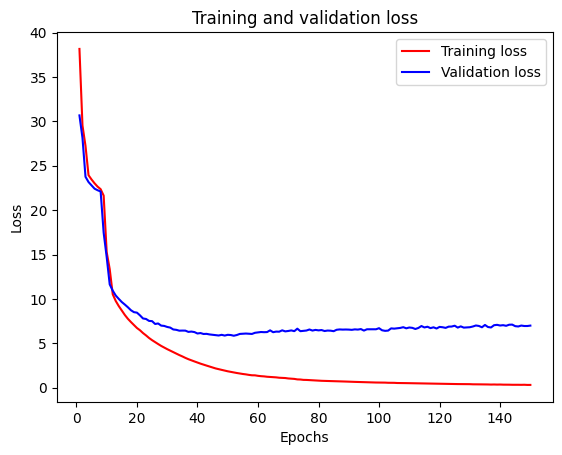

In [10]:
history_dict = history.history
history_dict.keys()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

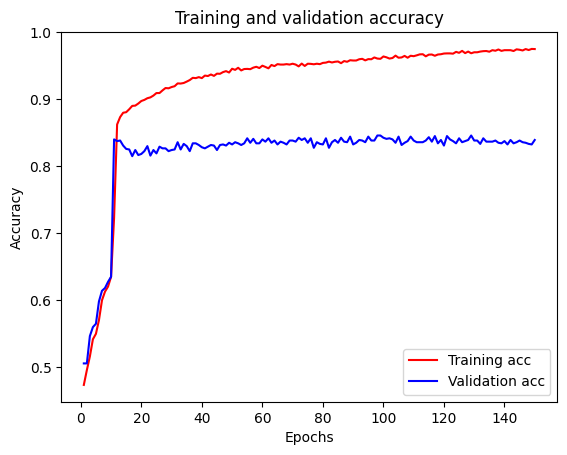

38/38 [==============================] - 0s 2ms/step - loss: 6.9905 - accuracy: 0.8392
6.990493297576904
0.8391666412353516


In [11]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


loss, accuracy = model_2.evaluate(Y_Pca, conjunto_teste)
print(loss)
print(accuracy)

In [12]:
y_3=model_2.predict(X_Pca)
np.set_printoptions(threshold=np.inf)

print(y_3)

150/150 [==============================] - 0s 3ms/step
[[1.32981348e+01 2.19609022e+00 6.21436357e+00]
 [4.51371670e+00 8.26830769e+00 8.53412807e-01]
 [3.78760767e+00 5.64405727e+00 9.46882367e-01]
 [1.27506771e+01 8.82077599e+00 1.61605895e-01]
 [1.55998116e+01 8.26443481e+00 1.21047354e+00]
 [1.55560341e+01 6.86190557e+00 1.56690729e+00]
 [2.44638968e+00 6.25340652e+00 4.48233366e+00]
 [2.94004703e+00 5.74197721e+00 2.80633473e+00]
 [3.77717209e+00 8.41256332e+00 1.99853563e+00]
 [6.67353058e+00 8.53330135e+00 8.50909615e+00]
 [1.42232108e+00 5.29446697e+00 1.48299026e+00]
 [1.24454212e+00 7.67561960e+00 9.82572460e+00]
 [1.57020855e+01 5.79979467e+00 7.42685127e+00]
 [2.34605265e+00 8.27653027e+00 4.86830187e+00]
 [1.58237779e+00 9.38115025e+00 9.18460178e+00]
 [2.39864540e+00 2.46271086e+00 1.80840266e+00]
 [1.65807140e+00 8.72784519e+00 9.14951515e+00]
 [1.60801601e+01 9.42841625e+00 6.93788338e+00]
 [1.12818251e+01 2.86346817e+00 1.91155040e+00]
 [1.82807434e+00 8.08049679e+00 7

In [13]:
print(conjunto)

[[13.01925978  1.98136755  8.55374797]
 [ 4.71661065  8.22269982  0.95743761]
 [ 3.95524517  5.7524872   1.07420731]
 [12.36629422  8.79540194  0.2299009 ]
 [16.34297427  8.24989366  0.70745326]
 [15.83162716  6.86640014  0.97411482]
 [ 2.36207494  6.29706031  4.49729482]
 [ 2.85981945  5.8178497   2.86281915]
 [ 4.03449587  8.30478627  2.0304434 ]
 [ 6.41096859  8.23773862  8.21935851]
 [ 1.5587689   5.34973485  1.34398033]
 [ 1.27739494  7.61152832  9.95031635]
 [14.74461151  5.73358638  9.50280245]
 [ 2.57843746  8.27353957  4.92418403]
 [ 1.28918728  9.42593546  9.47252856]
 [ 2.43618898  2.7445371   1.85126149]
 [ 1.71811256  8.76333867  9.18566651]
 [16.36347293  9.63112912  8.6619236 ]
 [12.12288081  3.21020117  0.71455118]
 [ 2.01845972  8.07185343  7.95997059]
 [ 2.14815282  9.96495079  8.76215465]
 [ 3.84519003  3.78154321  5.79798975]
 [ 2.19241621  9.06434079  7.6293206 ]
 [15.88468025  7.96485144  5.61387613]
 [ 7.23135561  8.80662964  0.17379831]
 [ 2.91052357  7.63700731

In [14]:
y=model_2.predict(Y_Pca)

print(y)

38/38 [==============================] - 0s 2ms/step
[[1.98444676e+00 3.45538568e+00 3.92609286e+00]
 [5.67733383e+00 0.00000000e+00 2.28658462e+00]
 [4.85302830e+00 4.16896105e+00 5.81331635e+00]
 [1.60009027e+00 8.51207066e+00 2.33577204e+00]
 [1.40595856e+01 7.38696671e+00 7.53614664e+00]
 [1.98441792e+01 7.70053625e+00 5.07722807e+00]
 [0.00000000e+00 4.12787247e+00 7.21317339e+00]
 [1.80747211e-01 3.56740069e+00 5.60261011e+00]
 [1.67176762e+01 9.27961349e+00 3.23625565e+00]
 [2.49161100e+00 0.00000000e+00 1.82806432e+00]
 [1.75198421e+01 8.42936039e+00 5.19456530e+00]
 [2.39051890e+00 7.54882765e+00 1.37147605e+00]
 [0.00000000e+00 6.88636208e+00 5.17901468e+00]
 [0.00000000e+00 3.93300819e+00 4.79975414e+00]
 [1.25987597e+01 3.17347360e+00 4.79961252e+00]
 [1.47437203e+00 7.59335613e+00 2.32768869e+00]
 [8.02366436e-01 6.00605965e+00 3.34991384e+00]
 [2.27443848e+01 9.53228092e+00 3.98386693e+00]
 [0.00000000e+00 8.67048359e+00 4.39272451e+00]
 [1.97404633e+01 7.05890036e+00 5.1

In [15]:
print(conjunto_teste)

[[ 1.494027    2.42176428  4.33150783]
 [13.99895769  1.10097144  3.30087729]
 [ 3.29654191  3.1293799   4.96580086]
 [ 3.40154899  8.4148573   2.90446869]
 [ 2.72392841  1.57938044  0.46011608]
 [18.39808402  7.64412162  6.28145968]
 [ 1.32767187  4.31383387  9.81876643]
 [ 1.32074842  3.0633005   6.98241725]
 [ 3.83218986  5.48585031  0.12688332]
 [11.91578752  0.85417172  9.74031963]
 [14.86352263  8.40726897  9.78232744]
 [ 3.40807837  7.49096551  1.68246184]
 [ 1.26776852  7.31671036  8.89617937]
 [ 1.22526631  4.24652147  4.58344453]
 [13.53781515  3.51808669  1.46056393]
 [ 3.25551814  7.62062796  2.87928569]
 [ 2.46749174  6.38651013  4.18515382]
 [17.30335339  9.63053582  0.11699015]
 [ 2.07447467  8.78704035  6.71792736]
 [18.16042124  6.98570468  6.43471283]
 [ 3.65382024  7.31700508  2.2035501 ]
 [13.72501631  6.30140962  8.2764309 ]
 [ 1.79899333  7.58464713  9.41471144]
 [10.05687956  9.49593703  7.95935698]
 [ 1.9001846   6.5222021   7.23360556]
 [ 5.33080663  3.8208127 

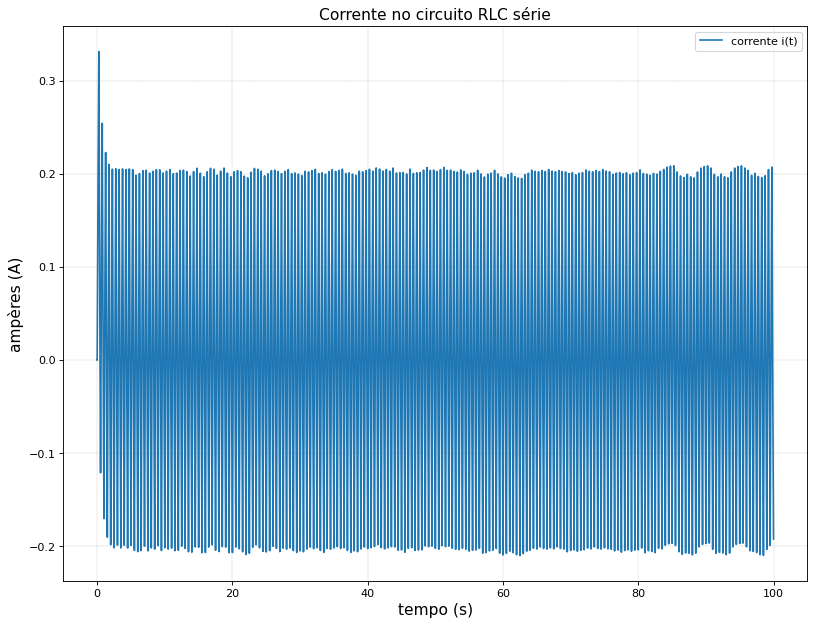

In [16]:
igerado=simulador(16.47710987,  9.11705861,  6.01149872,1)

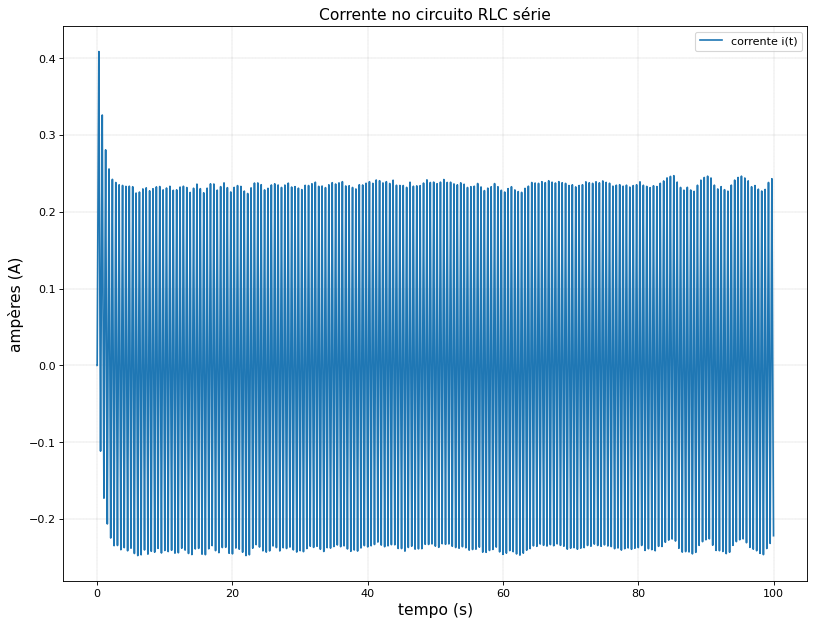

In [17]:
icorreto=simulador(9.86381054e+00, 7.87881327e+00, 1.77018321e+00,1)

In [18]:
np.save("X_pca-2.npy",X_Pca)
np.save("Y_pca-2.npy",Y_Pca)
np.save("conjunto-2",conjunto)
np.save("conjunto_teste-2",conjunto_teste)

In [19]:
print(igerado[110])
print(icorreto[110])


0.29684180875956995
0.3634147948104318


In [20]:
#np.save("conjunto_45000.npy",conjunto)

In [21]:

#model_2.save("modelo-0.1-10.h5")
